In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%time
identity=pd.read_csv("train_identity.csv")
transaction=pd.read_csv("train_transaction.csv")

Wall time: 48.8 s


In [3]:
print("Shape of train_identity.csv",identity.shape)
print("Shape of train_transaction.csv",transaction.shape)

Shape of train_identity.csv (144233, 41)
Shape of train_transaction.csv (590540, 394)


In [4]:
identity.columns[identity.isnull().any()]

Index(['id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09',
       'id_10', 'id_11', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18',
       'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26',
       'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34',
       'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [5]:
identity.isnull().sum().sort_values(ascending=False)

id_24            139486
id_25            139101
id_07            139078
id_08            139078
id_21            139074
id_26            139070
id_22            139064
id_27            139064
id_23            139064
id_18             99120
id_04             77909
id_03             77909
id_33             70944
id_10             69307
id_09             69307
id_30             66668
id_32             66647
id_34             66428
id_14             64189
DeviceInfo        25567
id_13             16913
id_16             14893
id_06              7368
id_05              7368
id_20              4972
id_19              4915
id_17              4864
id_31              3951
DeviceType         3423
id_02              3361
id_11              3255
id_28              3255
id_29              3255
id_15              3248
id_35              3248
id_36              3248
id_37              3248
id_38              3248
id_12                 0
id_01                 0
TransactionID         0
dtype: int64

In [6]:
transaction.columns[transaction.isnull().any()]

Index(['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
       'dist2', 'P_emaildomain',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=374)

In [7]:
transaction.isnull().sum().sort_values(ascending=False).head()

dist2    552913
D7       551623
D13      528588
D14      528353
D12      525823
dtype: int64

In [8]:
identity.TransactionID.nunique()

144233

In [9]:
transaction.TransactionID.nunique()

590540

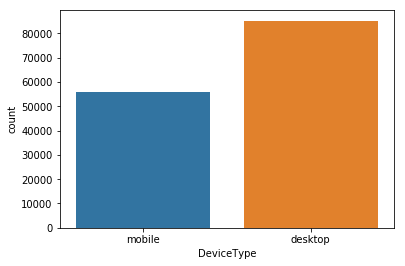

In [10]:
sns.countplot(data=identity,x="DeviceType")

In [11]:
identity.columns[identity.isnull().any()]#39 columns has null values

Index(['id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09',
       'id_10', 'id_11', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18',
       'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26',
       'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34',
       'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [12]:
#Number of null values in each column
null_identity_frame=identity.isnull().sum().to_frame().T

In [13]:
drop_columns=[]
for col in null_identity_frame.columns:
    if(null_identity_frame.loc[0,col]==0):
        continue
    elif((null_identity_frame.loc[0,col]*100/identity.shape[0])>70):
        drop_columns.append(col)
    else:
        print(f'columns {col} has {round(null_identity_frame.loc[0,col]*100/identity.shape[0])}% of null values')

columns id_02 has 2.0% of null values
columns id_03 has 54.0% of null values
columns id_04 has 54.0% of null values
columns id_05 has 5.0% of null values
columns id_06 has 5.0% of null values
columns id_09 has 48.0% of null values
columns id_10 has 48.0% of null values
columns id_11 has 2.0% of null values
columns id_13 has 12.0% of null values
columns id_14 has 45.0% of null values
columns id_15 has 2.0% of null values
columns id_16 has 10.0% of null values
columns id_17 has 3.0% of null values
columns id_18 has 69.0% of null values
columns id_19 has 3.0% of null values
columns id_20 has 3.0% of null values
columns id_28 has 2.0% of null values
columns id_29 has 2.0% of null values
columns id_30 has 46.0% of null values
columns id_31 has 3.0% of null values
columns id_32 has 46.0% of null values
columns id_33 has 49.0% of null values
columns id_34 has 46.0% of null values
columns id_35 has 2.0% of null values
columns id_36 has 2.0% of null values
columns id_37 has 2.0% of null values


In [14]:
identity.drop(columns=drop_columns,inplace=True)

In [15]:
identity.shape

(144233, 32)

In [16]:
identity.id_01.describe()

count    144233.000000
mean        -10.170502
std          14.347949
min        -100.000000
25%         -10.000000
50%          -5.000000
75%          -5.000000
max           0.000000
Name: id_01, dtype: float64

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


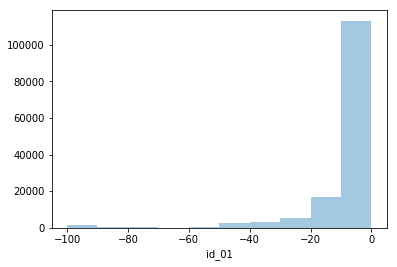

In [17]:
sns.distplot(identity.id_01,bins=10,hist=True,kde=False)

In [18]:
identity.id_01=[x if x>=-20 else -10 for x in identity.id_01]

C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


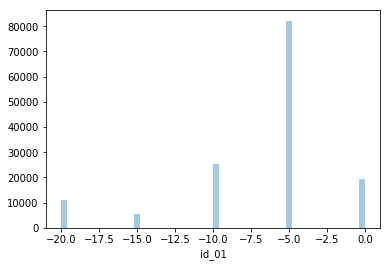

In [20]:
sns.distplot(identity.id_01,hist=True,kde=False)

C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


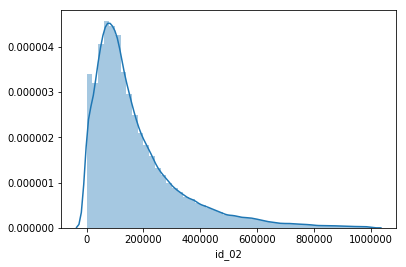

In [21]:
sns.distplot(identity[identity.id_02.notna()]["id_02"])

In [22]:
mean_id_02=identity.id_02.mean()

C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


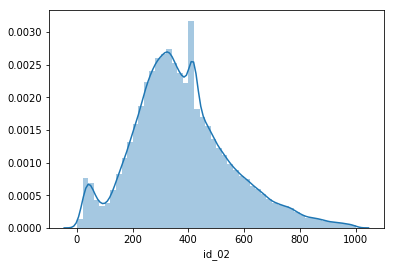

In [23]:
sns.distplot(np.power(identity.id_02.fillna(mean_id_02),0.5))#perform square root on id_02

C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


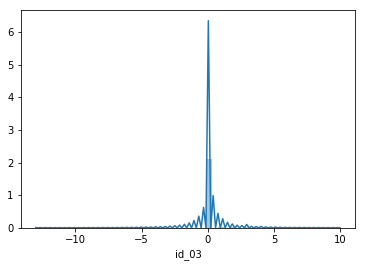

In [24]:
def distribution_plots(df,column_name):
    sns.distplot(df[df[column_name].notna()][column_name])
    plt.show()


sns.distplot(identity[identity.id_03.notna()]["id_03"])

C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


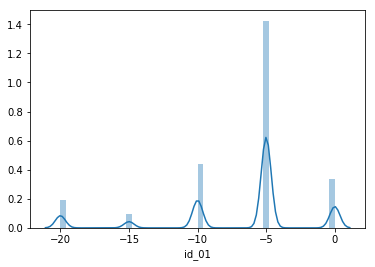

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


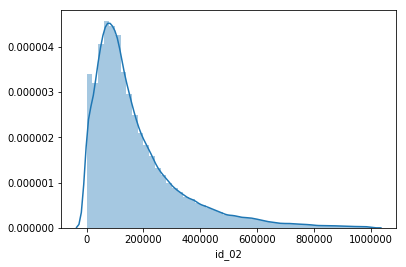

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


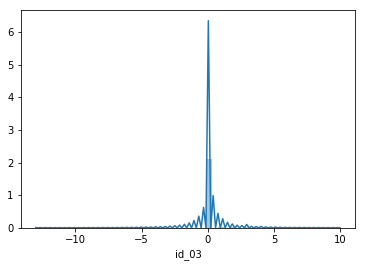

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


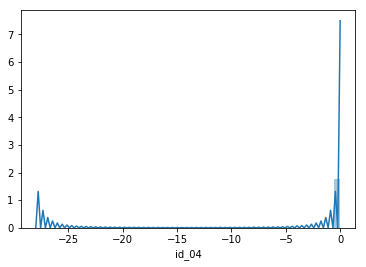

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


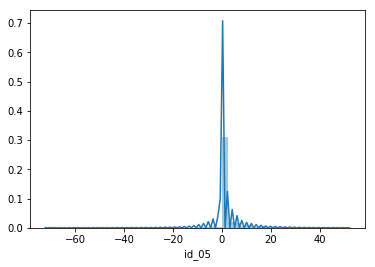

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


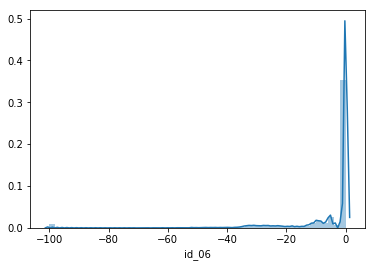

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


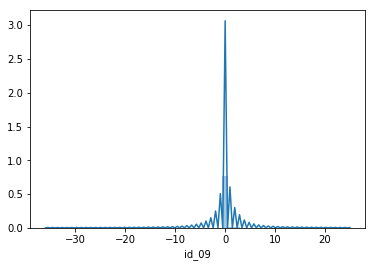

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


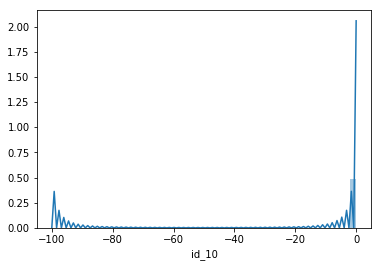

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


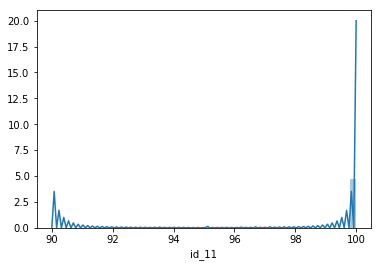

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


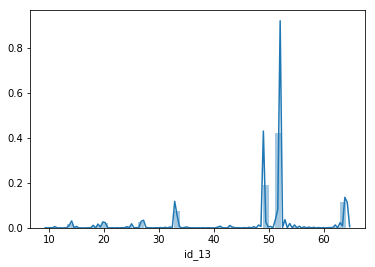

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


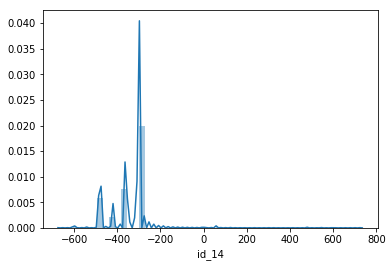

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


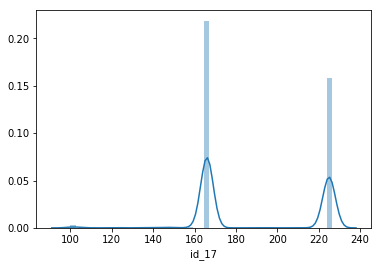

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


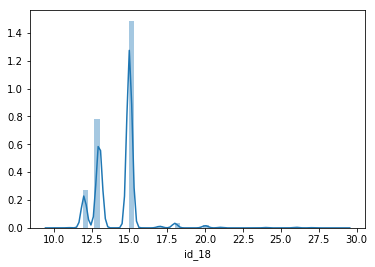

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


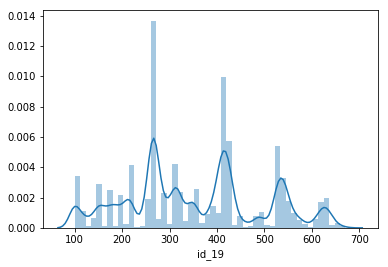

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


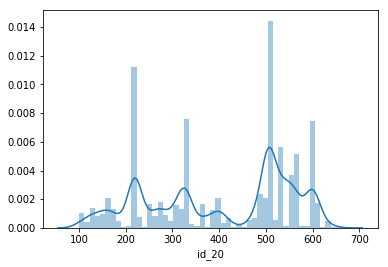

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


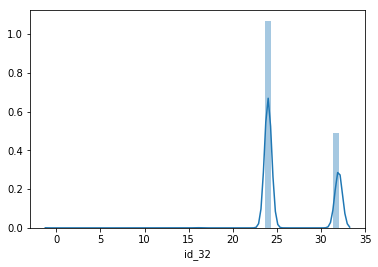

In [25]:
for col in identity.select_dtypes(exclude="object").columns:
    if col in ["TransactionID"]:
        continue
    else:
        distribution_plots(identity,col)

In [26]:
identity[identity.id_03.notna()].groupby("id_03").size()

id_03
-13.0        3
-12.0        3
-11.0        6
-10.0       17
-9.0         6
-8.0        14
-7.0        21
-6.0        31
-5.0        33
-4.0        21
-3.0         8
-2.0        12
-1.0        12
 0.0     63903
 1.0       863
 2.0       421
 3.0       668
 4.0       100
 5.0       109
 6.0        64
 7.0         4
 8.0         1
 9.0         3
 10.0        1
dtype: int64

In [27]:
identity.id_03=[1 if x>0 else (-1 if x<0 else 0) for x in identity.id_03]

In [28]:
identity.columns[identity.isnull().any()]

Index(['id_02', 'id_04', 'id_05', 'id_06', 'id_09', 'id_10', 'id_11', 'id_13',
       'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [29]:
identity[identity.id_04.notna()].groupby("id_04").size()

id_04
-28.0        2
-13.0       24
-12.0       34
-11.0       35
-10.0       30
-9.0        26
-8.0        64
-7.0        21
-6.0        98
-5.0       132
-4.0        51
-3.0        10
-2.0        15
-1.0        43
 0.0     65739
dtype: int64

In [30]:
identity.id_04=[1 if x<0 else x for x in identity.id_04]

In [31]:
identity[identity.id_09.notna()].groupby("id_09").size()

id_09
-36.0        1
-31.0        3
-30.0        1
-26.0        2
-24.0        1
-23.0        4
-22.0        4
-21.0        3
-20.0        1
-19.0        2
-18.0        2
-17.0        4
-15.0        2
-14.0        1
-13.0        4
-12.0        4
-11.0       18
-10.0       39
-9.0        27
-8.0        37
-7.0        39
-6.0        66
-5.0        60
-4.0        42
-3.0        31
-2.0        27
-1.0        38
 0.0     70378
 1.0      1616
 2.0       773
 3.0       966
 4.0       270
 5.0       207
 6.0       145
 7.0        33
 8.0        23
 9.0        16
 10.0       11
 11.0        6
 12.0        6
 13.0        4
 14.0        1
 15.0        3
 16.0        3
 17.0        1
 25.0        1
dtype: int64

In [32]:
identity.id_09=[1 if x>0 else (-1 if x<0 else 0) for x in identity.id_09]

In [33]:
identity[identity.id_10.notna()].groupby("id_10").size()

id_10
-100.0       20
-68.0         2
-65.0         1
-64.0         1
-60.0         4
-59.0         1
-58.0         1
-57.0         1
-56.0         4
-55.0         1
-54.0         7
-53.0         1
-51.0         1
-50.0         1
-49.0         4
-47.0         6
-45.0         1
-44.0         1
-43.0         5
-42.0         1
-41.0         1
-40.0         1
-39.0         3
-38.0         5
-37.0         2
-36.0         3
-35.0         4
-34.0         3
-33.0        10
-32.0         2
          ...  
-29.0        13
-28.0        25
-27.0         7
-26.0         7
-25.0        13
-24.0        15
-23.0         7
-22.0        14
-21.0        16
-20.0         6
-19.0        11
-18.0        11
-17.0         7
-16.0        33
-15.0        18
-14.0        17
-13.0        89
-12.0       118
-11.0       127
-10.0       115
-9.0        118
-8.0        147
-7.0        109
-6.0        295
-5.0        247
-4.0         87
-3.0         24
-2.0         33
-1.0        200
 0.0      72879
Length: 62, dtype:

In [34]:
identity.id_10=[1 if x<0 else x for x in identity.id_10]

In [35]:
identity[identity.id_11==100].shape

(133162, 32)

In [36]:
#dropping id_11 since most have a value of 100
identity.drop(columns=["id_11"],inplace=True)

In [37]:
identity[identity.id_12.notna()].groupby("id_12").size()

id_12
Found        21208
NotFound    123025
dtype: int64

In [38]:
identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_09', 'id_10', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17',
       'id_18', 'id_19', 'id_20', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32',
       'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

In [39]:
identity[identity.id_34.notna()].groupby("id_34").size()#id_32 is mostly categorical

id_34
match_status:-1        3
match_status:0       415
match_status:1     17376
match_status:2     60011
dtype: int64

In [40]:
#parse id_34 

In [41]:
#id_32 is mostly categorical
identity[identity.DeviceInfo.notna()].groupby("DeviceInfo").size()

DeviceInfo
0PAJ5                           1
0PJA2                           1
0PM92                           4
1016S                           1
2PQ93                           1
2PS64 Build/NRD90M              6
2PYB2                           4
2PZC5                           2
4003A                           1
4009F                           2
4013M Build/KOT49H             13
4027A Build/KOT49H              2
4034E                           1
4034G                           1
4047A Build/NRD90M              7
4047G Build/NRD90M             17
47418                           1
5010G Build/MRA58K             60
5010S Build/MRA58K             13
5011A Build/NRD90M             24
5012G Build/MRA58K             29
5015A Build/LMY47I             38
5017A                           2
5025G Build/LMY47I             38
5042A                           2
5044A                           1
5045I                           1
5049W Build/NRD90M              9
5051A Build/MMB29M              6
505

In [42]:
identity.columns[identity.isnull().any()]

Index(['id_02', 'id_04', 'id_05', 'id_06', 'id_10', 'id_13', 'id_14', 'id_15',
       'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [43]:
identity.id_31.nunique()

130

In [ ]:
median_id_02=identity.id_02.median
identity.id_02.fillna(median_id_02,inplace=True)

In [ ]:
#id_04 has low variance and hence being dropped
print(identity.id_04.value_counts())
identity.drop(columns=["id_04"],inplace=True)

In [ ]:
identity.id_05=[x if x>0 else -1 for x in identity.id_05]

In [ ]:
identity.id_10.fillna(0,inplace=True)

In [45]:
#Number of missing values
identity[identity.columns[9]].isnull().sum()

0

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


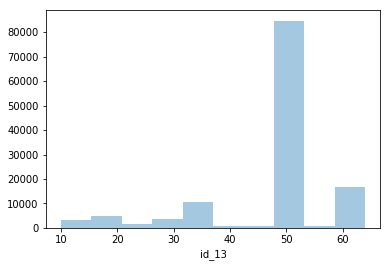

In [46]:
sns.distplot(identity[identity.id_13.notna()]["id_13"],hist=True,kde=False,bins=10)

In [47]:
mode_id_13=identity.id_13.mode()
identity.id_13.fillna(mode_id_13,inplace=True)

In [48]:
identity.id_14=[1 if x >0 else (-1 if x < 0 else 0) for x in identity.id_14]

In [49]:
identity[identity.columns[11]].isnull().sum()

0

In [50]:
identity.id_15.value_counts()

Found      67728
New        61612
Unknown    11645
Name: id_15, dtype: int64

In [51]:
identity.id_15.fillna("Unknown",inplace=True)

In [52]:
identity[identity.columns[16]].isnull().sum()

4915

In [53]:
identity.id_16.fillna("NotFound",inplace=True)

In [54]:
identity[identity.columns[17]].isnull().sum()

4972

In [55]:
identity.id_28.value_counts()#No idea how to handle this.Need to explore more

Found    76232
New      64746
Name: id_28, dtype: int64

In [56]:
identity[identity.columns[18]].isnull().sum()

3255

In [57]:
identity.id_29.fillna("NotFound",inplace=True)

In [58]:
#id_31 need to explore more to fillna

In [59]:
identity.id_32.fillna(24,inplace=True)

In [60]:
identity[identity.columns[22]].isnull().sum()

0

In [61]:
identity.drop(columns=["id_33"],inplace=True)

In [62]:
identity.id_34.unique()

array(['match_status:2', 'match_status:1', nan, 'match_status:0',
       'match_status:-1'], dtype=object)

In [63]:
identity.id_34=[1 if x=="match_status:1" else x for x in identity.id_34]
identity.id_34=[2 if x=="match_status:2" else x for x in identity.id_34]
identity.id_34=[-1 if x=="match_status:-1" else x for x in identity.id_34]
identity.id_34=[0 if x=="match_status:0" else x for x in identity.id_34]

In [64]:
identity.id_34.fillna(-1,inplace=True)

In [65]:
identity[identity.columns[28]].isnull().sum()

3423

In [66]:
#Need to explore id_35,36,37,38 to fill missing values

In [67]:
identity.DeviceType.value_counts()

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

In [68]:
identity.id_06.fillna(0,inplace=True)
identity.id_13.fillna(52,inplace=True)
identity.id_17.fillna(166,inplace=True)

In [69]:
identity.id_18.fillna(15,inplace=True)

In [70]:
median_id_19=identity.id_19.median()
identity.id_19.fillna(median_id_19,inplace=True)

In [71]:
identity.columns[identity.isnull().any()]

Index(['id_02', 'id_04', 'id_05', 'id_10', 'id_20', 'id_28', 'id_30', 'id_31',
       'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [72]:
identity.drop(columns=['id_20', 'id_28', 'id_30', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38','DeviceType', 'DeviceInfo'],inplace=True)

In [73]:
identity.columns[identity.isnull().any()]

Index(['id_02', 'id_04', 'id_05', 'id_10'], dtype='object')

In [74]:
%%time
train=transaction.merge(identity,how="left",on="TransactionID")

Wall time: 13.8 s


In [75]:
train.shape

(590540, 413)

In [76]:
train.columns[train.isnull().any()]

Index(['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
       'dist2', 'P_emaildomain',
       ...
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_29',
       'id_32', 'id_34'],
      dtype='object', length=393)

In [77]:
train.isnull().sum().sort_values(ascending=False).T

dist2             552913
D7                551623
D13               528588
D14               528353
D12               525823
id_04             524216
D6                517353
D8                515614
D9                515614
id_10             515614
V156              508595
V155              508595
V154              508595
V153              508595
V163              508595
V149              508595
V148              508595
V147              508595
V158              508595
V146              508595
V157              508595
V142              508595
V161              508595
V162              508595
V141              508595
V140              508595
V139              508595
V138              508595
V160              508589
V159              508589
                   ...  
V317                  12
V316                  12
V312                  12
V311                  12
V310                  12
V309                  12
V308                  12
V307                  12
V306                  12


In [78]:
train[train["id_13"].notna()].shape

(144233, 413)

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


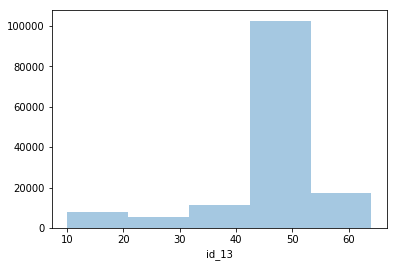

In [79]:
sns.distplot(train[train["id_13"].notna()]["id_13"],hist=True,bins=5,kde=False)

In [80]:
null_frame=train.isnull().sum().to_frame().T

In [81]:
train.shape

(590540, 413)

In [82]:
null_frame

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_29,id_32,id_34
0,0,0,0,0,0,0,8933,1565,1577,4259,...,446307,446307,446307,446307,446307,446307,446307,446307,446307,446307


In [83]:
drop_train_columns=[]
for col in null_frame.columns:
    if col in ["TransactionID","isFraud"]:
        continue
    elif(round(null_frame.loc[0,col]*100/train.shape[0])>=70):
        drop_train_columns.append(col)

In [84]:
train.drop(columns=drop_train_columns,inplace=True)

In [85]:
train.shape

(590540, 226)

In [86]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


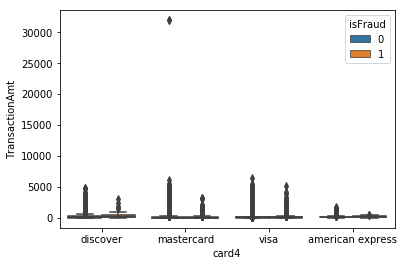

In [87]:
sns.boxplot(x="card4",y="TransactionAmt",data=train,hue="isFraud")

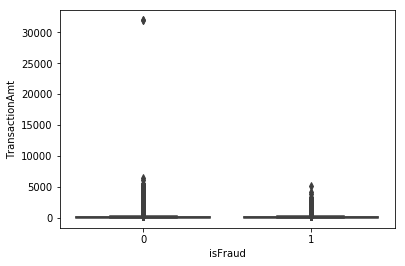

In [88]:
sns.boxplot(x="isFraud",y="TransactionAmt",data=train)

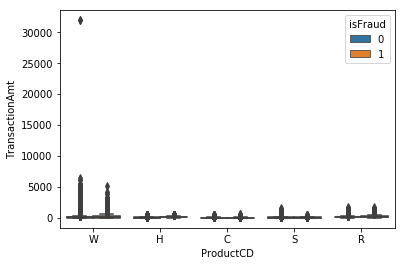

In [89]:
sns.boxplot(x="ProductCD",y="TransactionAmt",data=train,hue="isFraud")

In [90]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
train[train.card2.isnull()].shape

(8933, 226)

In [92]:
train.card2.describe()

count    581607.000000
mean        362.555488
std         157.793246
min         100.000000
25%         214.000000
50%         361.000000
75%         512.000000
max         600.000000
Name: card2, dtype: float64

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


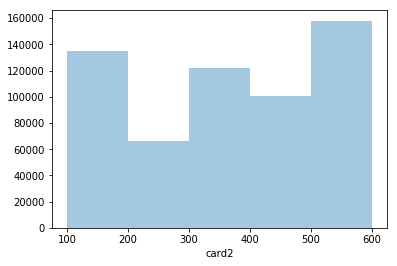

In [93]:
sns.distplot(train[train.card2.notna()]["card2"],kde=False,hist=True,bins=5)

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


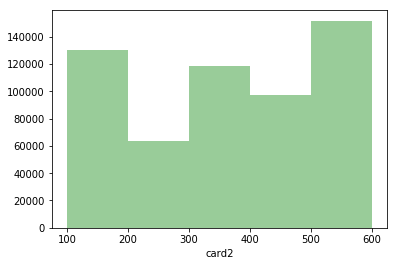

In [94]:
sns.distplot(train[(train.card2.notna())&(train.isFraud==0)]["card2"],kde=False,hist=True,bins=5,color="green")

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


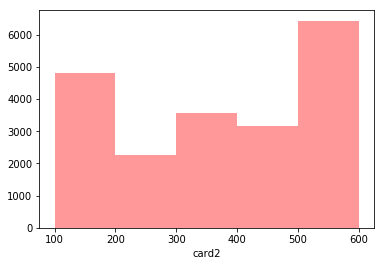

In [95]:
sns.distplot(train[(train.card2.notna())&(train.isFraud==1)]["card2"],kde=False,hist=True,bins=5,color="red")

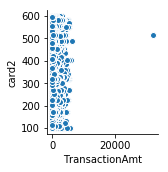

In [96]:
sns.pairplot(data=train,x_vars="TransactionAmt",y_vars="card2")

In [97]:
#Removing Outlier in TransactionAmt
train=train[train.TransactionAmt<20000]

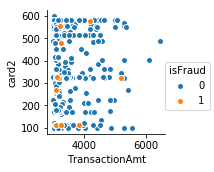

In [98]:
sns.pairplot(hue="isFraud",data=train[train.TransactionAmt>3000],x_vars="TransactionAmt",y_vars="card2")#Outliers need to be handled

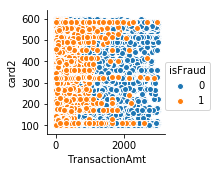

In [99]:
sns.pairplot(hue="isFraud",data=train[train.TransactionAmt<3000],x_vars="TransactionAmt",y_vars="card2")#Outliers need to be handled

In [100]:
train[["TransactionAmt","card2"]].corr()

,TransactionAmt,card2
TransactionAmt,1.000000,0.016199
card2,0.016199,1.000000


In [101]:
cpy1=train.copy()

In [102]:
cpy1.dropna(subset=["card2"],inplace=True)

In [103]:
null_frame=cpy1.isnull().sum().to_frame().T

In [104]:
null_frame.columns[80:]

Index(['V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=146)

In [105]:
temp_list=[]
for col in null_frame:
    if col in ["TransactionID","isFraud"]:
        continue
    elif(null_frame.loc[0,col]<20000):
        temp_list.append(col)

In [106]:
cpy1.shape

(581605, 226)

In [107]:
train=cpy1.copy()

In [108]:
train.dropna(subset=temp_list,inplace=True)

In [109]:
null_frame=train.isnull().sum().to_frame().T

In [110]:
train.addr1.describe()

count    513443.000000
mean        290.787624
std         101.672642
min         100.000000
25%         204.000000
50%         299.000000
75%         330.000000
max         540.000000
Name: addr1, dtype: float64

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


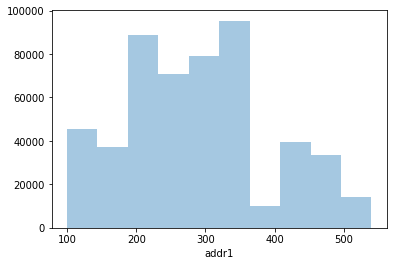

In [111]:
sns.distplot(train[train.addr1.notna()]["addr1"],hist=True,kde=False,bins=10)

In [114]:
train.loc[train.addr1.isna(),"addr1"]=train.addr1.median()

In [120]:
#train.addr1.fillna(train.addr1.median,inplace=True)

In [115]:
cpy1=train.loc[:, train.columns != "addr2"].copy()

In [116]:
#train.drop(columns=["addr2"],inplace=True)

In [117]:
train=cpy1.loc[:, cpy1.columns != "addr2"].copy()

In [118]:
train.loc[train.dist1.isna(),"dist1"]=0

In [119]:
#train.dist1.fillna(0,inplace=True)

In [121]:
cpy1=train.copy()

In [123]:
cpy1.dist1=[0 if x<=28 else 1 for x in cpy1.dist1]

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


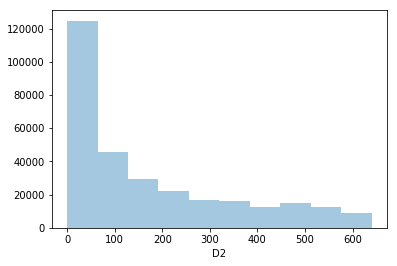

In [124]:
sns.distplot(cpy1[cpy1.D2.notna()]["D2"],hist=True,kde=False,bins=10)

C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


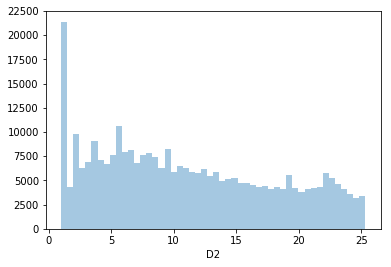

In [125]:
sns.distplot(np.power(cpy1[cpy1.D2.notna()]["D2"]+1,0.5),hist=True,kde=False)

In [126]:
#train.D2.fillna(train.D2.median,inplace=True)
cpy1.loc[cpy1.D2.isna(),"D2"]=cpy1.D2.median()

In [127]:
#train.P_emaildomain.fillna("gmail.com",inplace=True)
cpy1.loc[cpy1.P_emaildomain.isna(),"P_emaildomain"]="gmail.com"

In [128]:
cpy1.D3.describe()

count    321751.000000
mean         28.401257
std          62.535416
min           0.000000
25%           1.000000
50%           8.000000
75%          27.000000
max         819.000000
Name: D3, dtype: float64

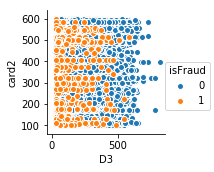

In [129]:
sns.pairplot(hue="isFraud",data=cpy1[cpy1.D3>27],x_vars="D3",y_vars="card2")#Outliers need to be handled

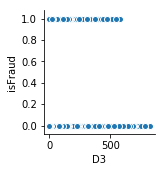

In [130]:
sns.pairplot(data=cpy1,x_vars="D3",y_vars="isFraud")#Outliers need to be handled

In [131]:
train=cpy1.copy()

In [132]:
train["Feature1_D3"]=[1 if x>600 else 0 for x in train.D3]

In [133]:
#train.drop(columns=["D3"],inplace=True)
cpy1=train.loc[:, train.columns != "D3"].copy()

In [134]:
cpy1.D4.describe()

count    412333.000000
mean        140.542246
std         191.401201
min        -122.000000
25%           0.000000
50%          26.000000
75%         255.000000
max         869.000000
Name: D4, dtype: float64

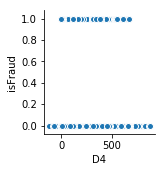

In [135]:
sns.pairplot(data=cpy1,x_vars="D4",y_vars="isFraud")#Outliers need to be handled

In [136]:
#train.D4.fillna(train.D4.median(),inplace=True)
cpy1.loc[cpy1.D4.isna(),"D4"]=cpy1.D4.median()

In [137]:
train=cpy1.copy()

In [138]:
train["feature1_D4"]=[1 if x<0 else 0 for x in train.D4]

In [139]:
train["feature2_D4"]=[1 if x<600 else 0 for x in train.D4]

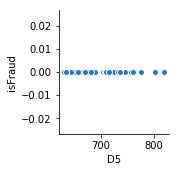

In [140]:
sns.pairplot(data=train[train.D5>630],x_vars="D5",y_vars="isFraud")#Outliers need to be handled

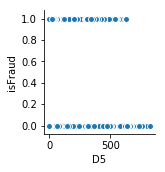

In [141]:
sns.pairplot(data=train,x_vars="D5",y_vars="isFraud")#Outliers need to be handled

In [142]:
train.D5.fillna(train.D5.median(),inplace=True)

In [143]:
train["feature1_D5"]=[1 if x>630 else 0 for x in train.D5]

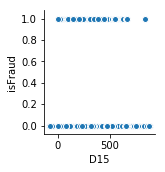

In [144]:
sns.pairplot(data=train,x_vars="D15",y_vars="isFraud")#Outliers need to be handled

In [145]:
train.D10.fillna(train.D10.median(),inplace=True)
train["feature1_D10"]=[1 if x>630 else 0 for x in train.D10]
train.D11.fillna(train.D11.median(),inplace=True)
train["feature1_D11"]=[1 if x<0 else 0 for x in train.D11]
train.D15.fillna(train.D15.median(),inplace=True)
train["feature1_D15"]=[1 if x<0 else 0 for x in train.D15]

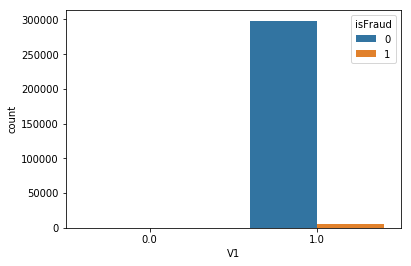

In [146]:
sns.countplot(x="V1",data=train,hue="isFraud")

In [153]:
for col in train.select_dtypes(include="object").columns:
    train.loc[train[col].isna(),col]=train[col].mode()[0]

In [156]:
for col in train.select_dtypes(exclude="object").columns:
    train.loc[train[col].isna(),col]=train[col].median()

In [157]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [158]:
#sns.countplot(data=train,x="DeviceType",hue="isFraud")

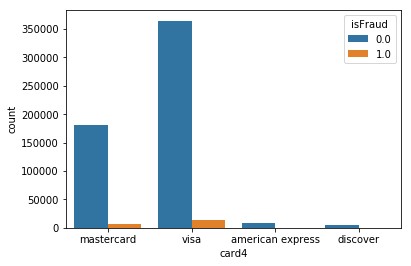

In [159]:
sns.countplot(data=train,x="card4",hue="isFraud")

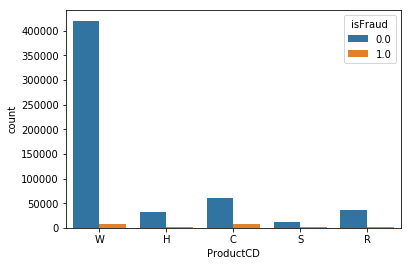

In [160]:
sns.countplot(data=train,x="ProductCD",hue="isFraud")

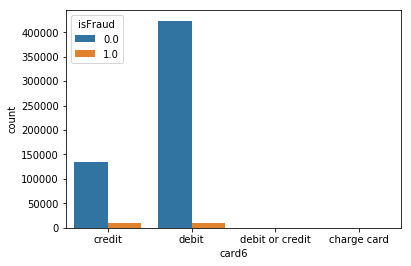

In [161]:
sns.countplot(data=train,x="card6",hue="isFraud")

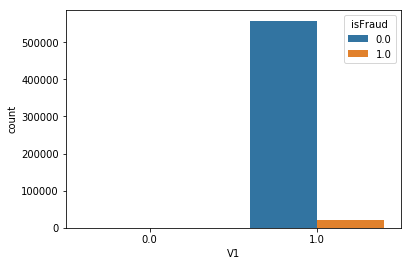

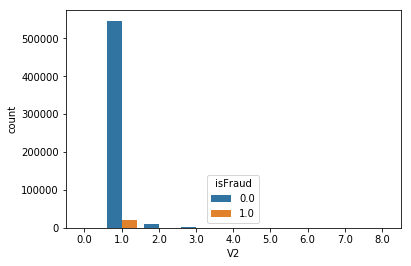

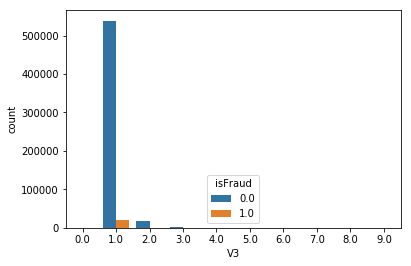

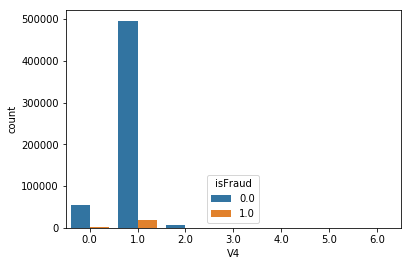

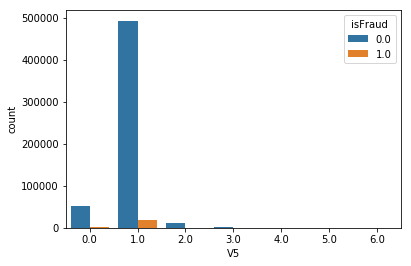

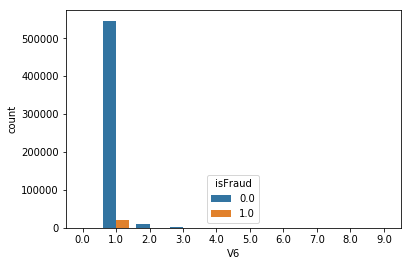

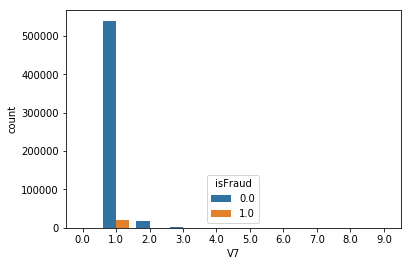

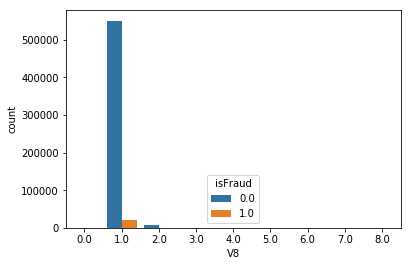

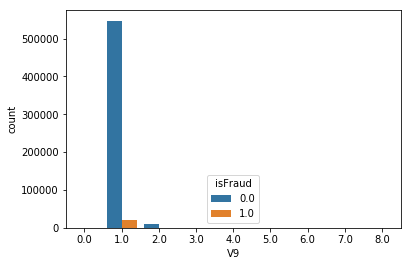

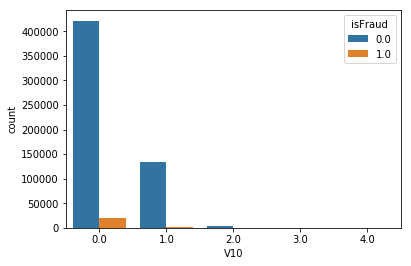

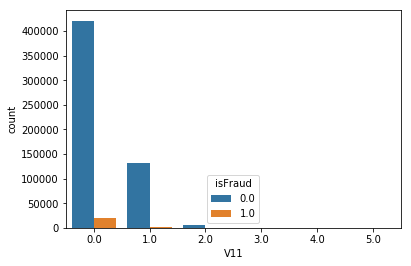

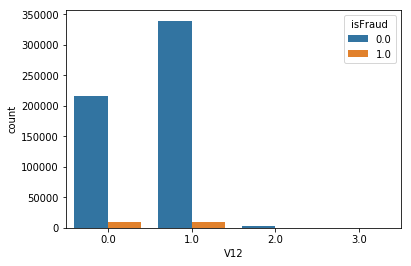

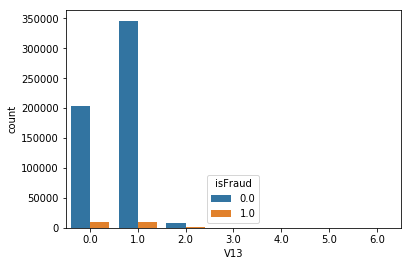

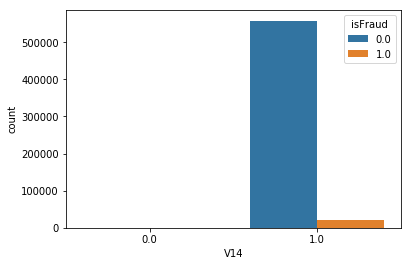

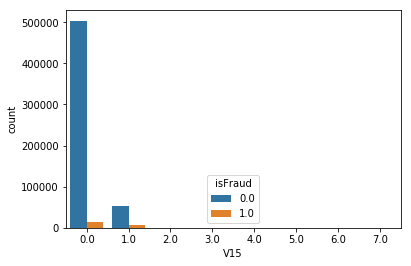

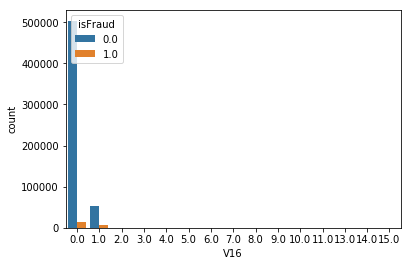

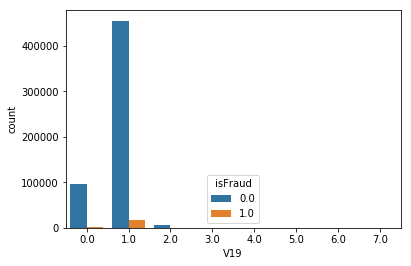

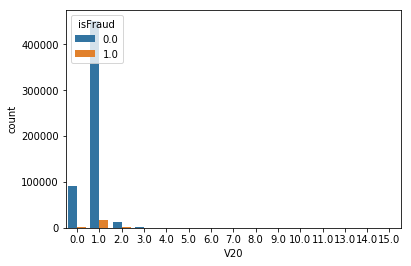

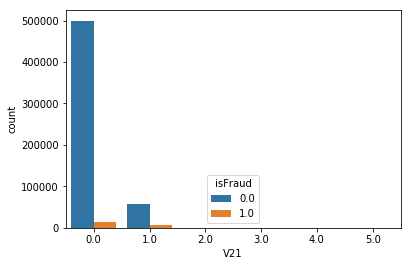

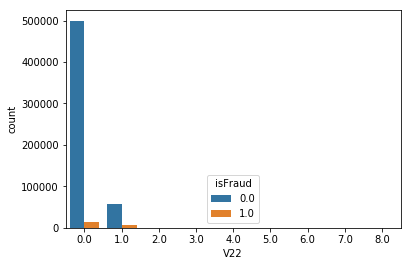

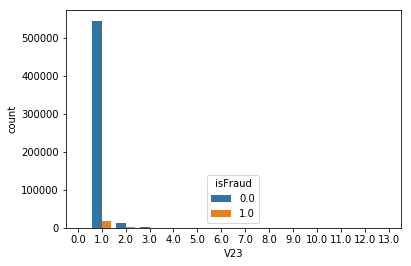

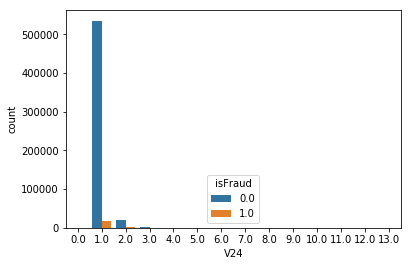

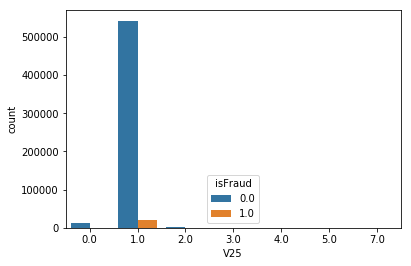

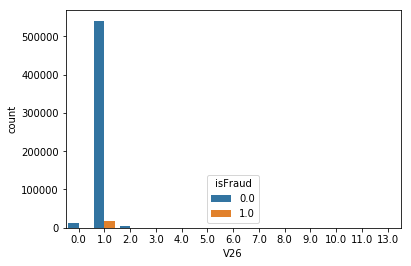

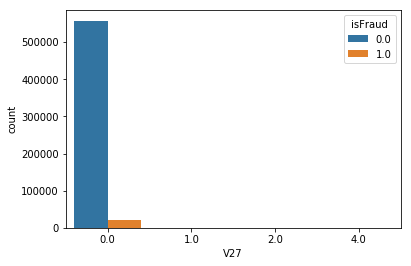

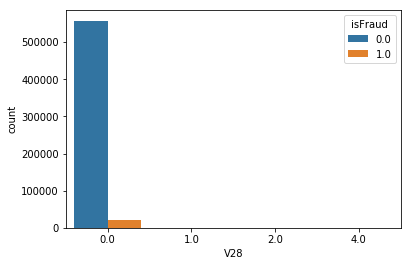

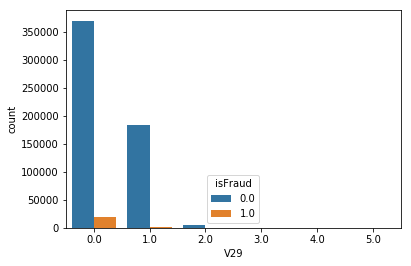

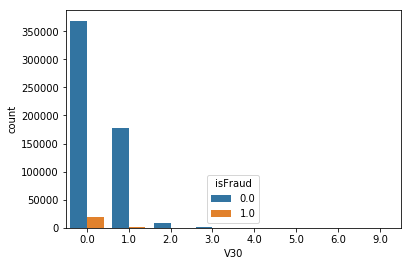

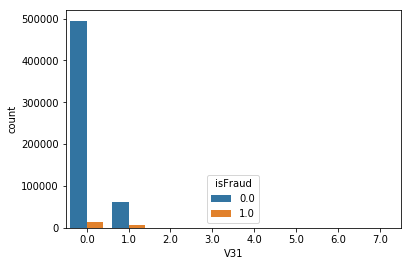

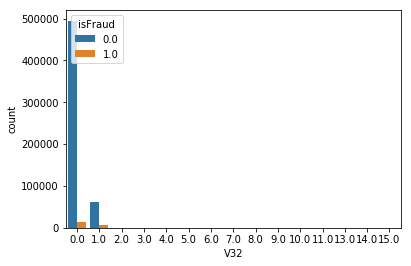

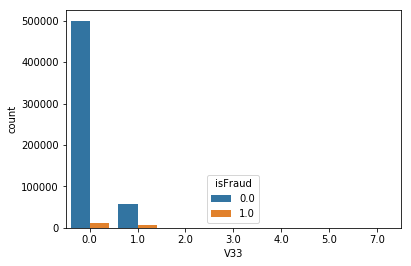

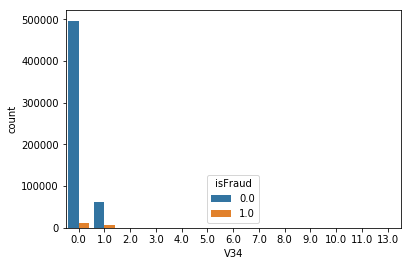

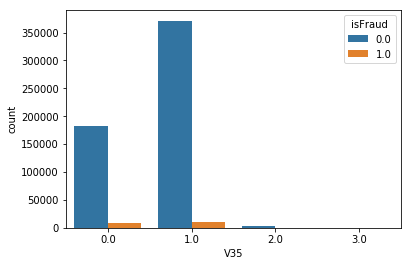

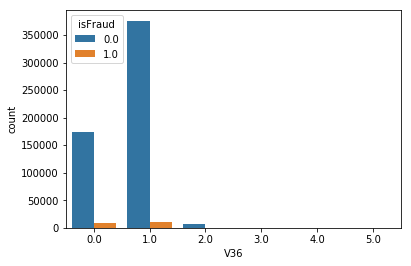

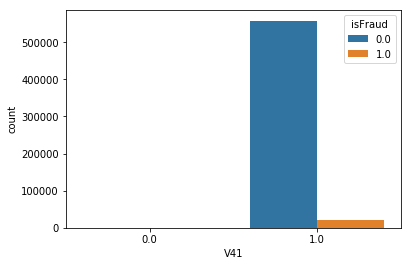

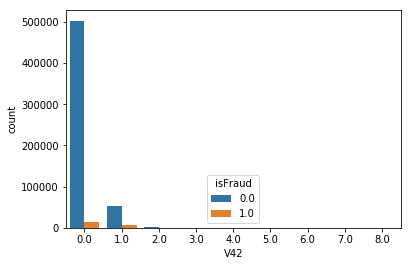

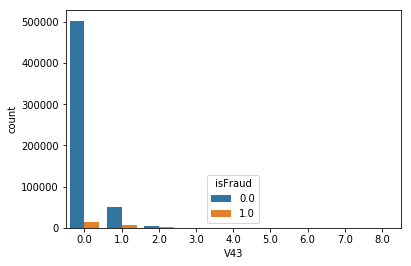

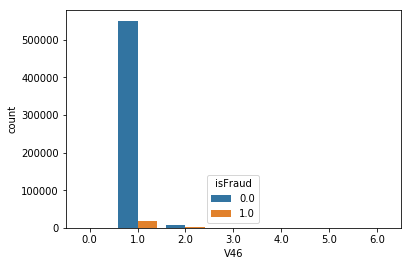

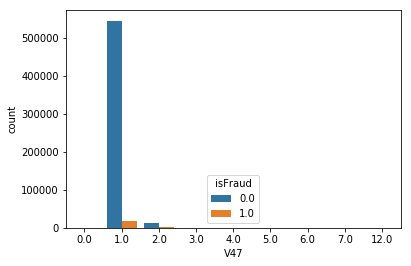

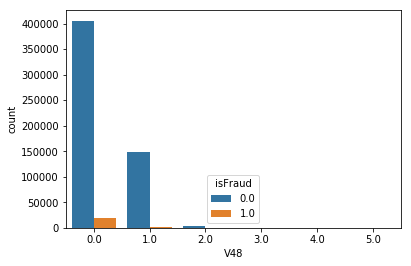

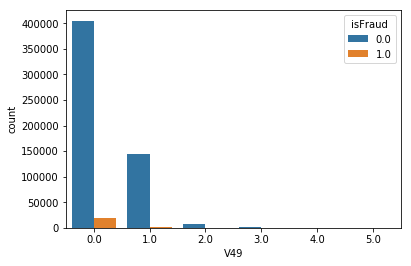

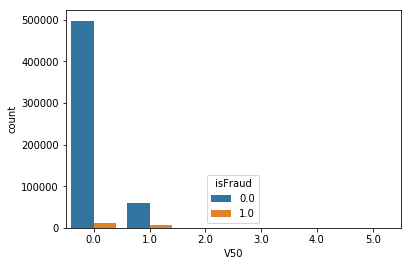

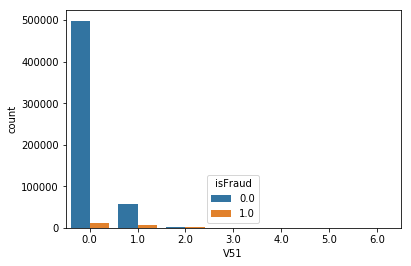

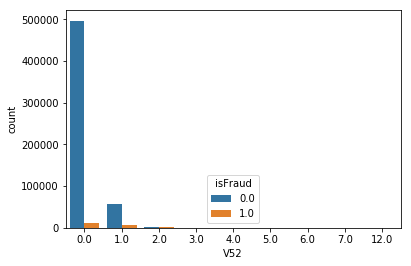

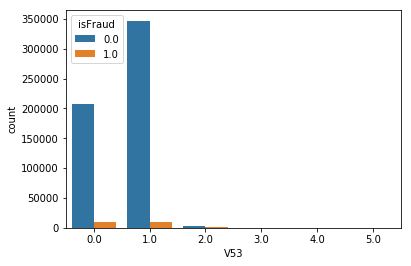

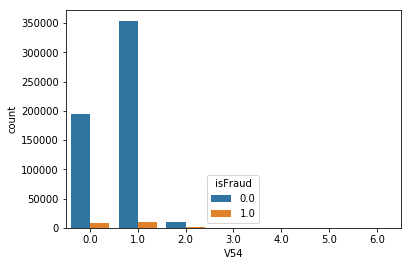

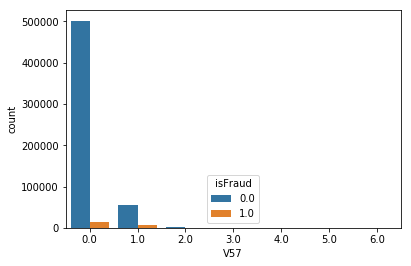

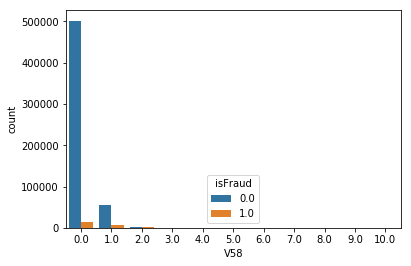

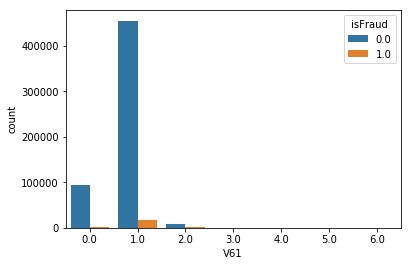

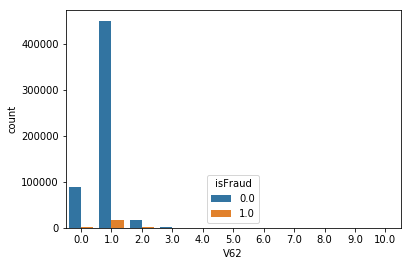

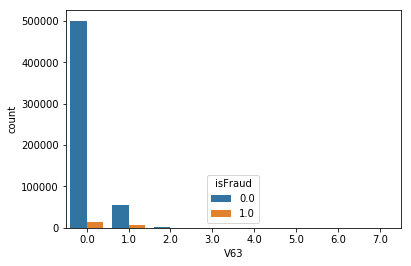

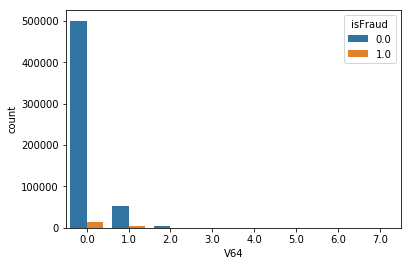

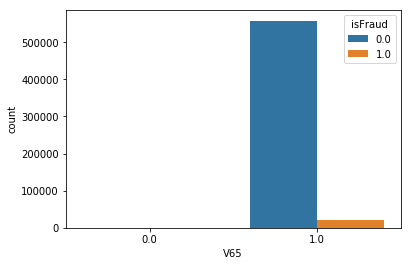

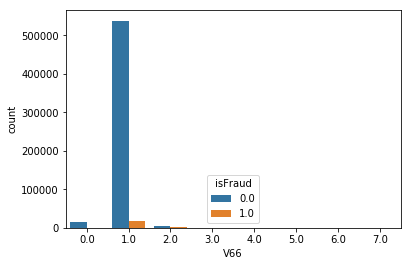

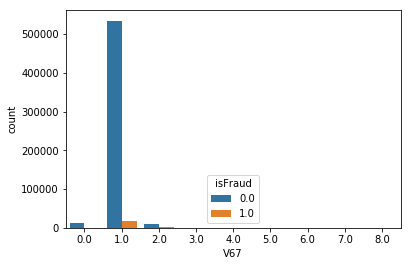

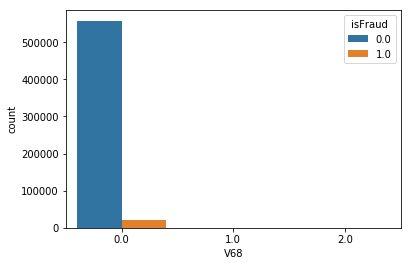

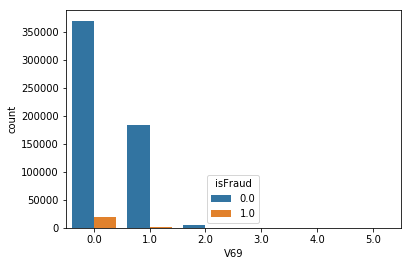

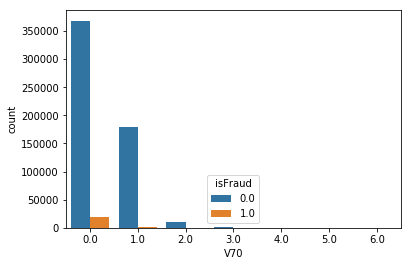

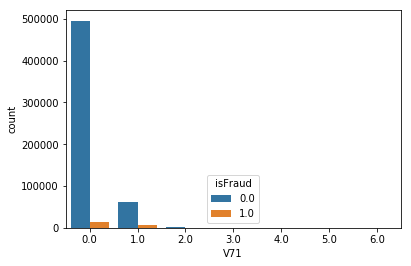

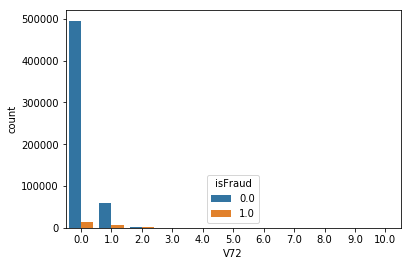

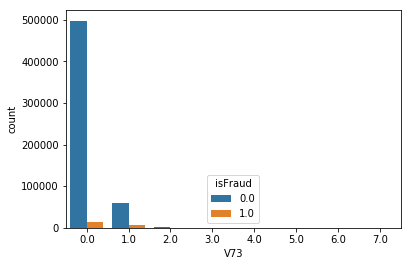

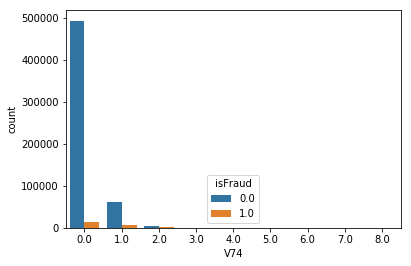

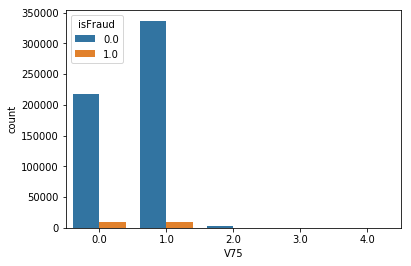

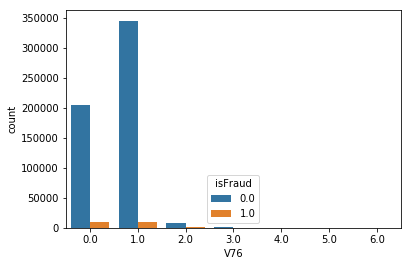

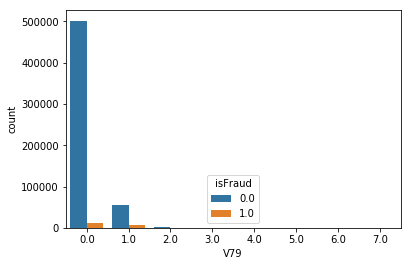

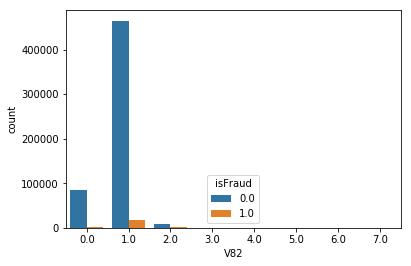

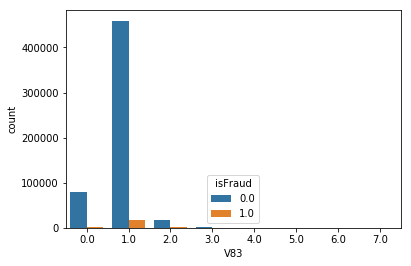

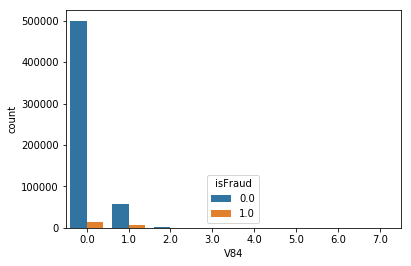

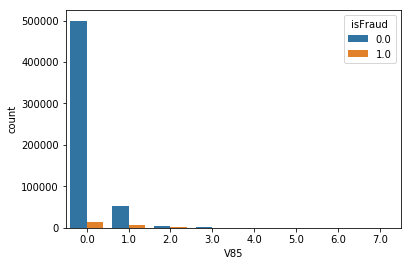

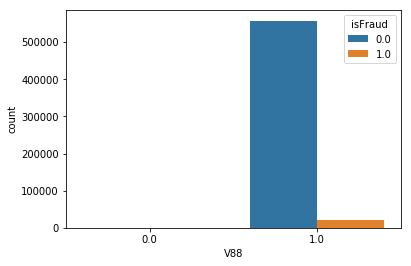

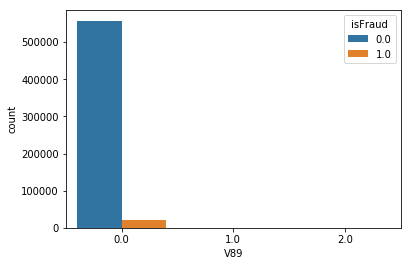

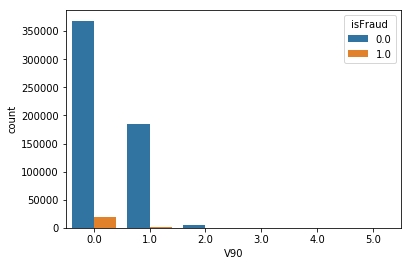

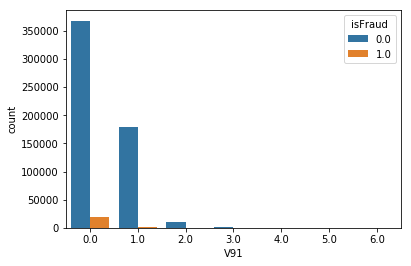

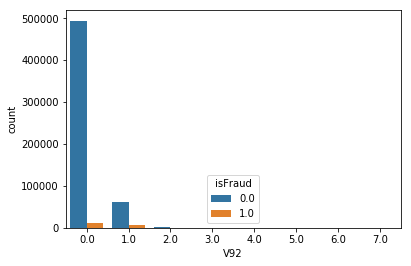

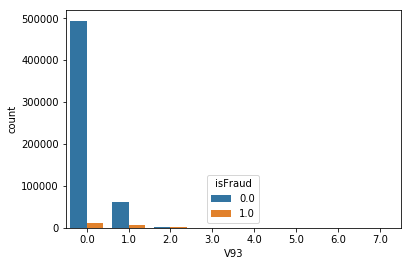

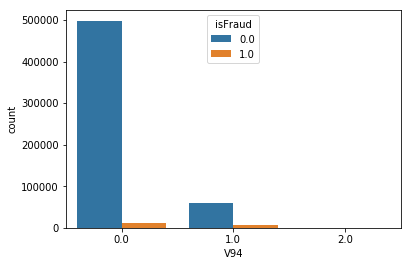

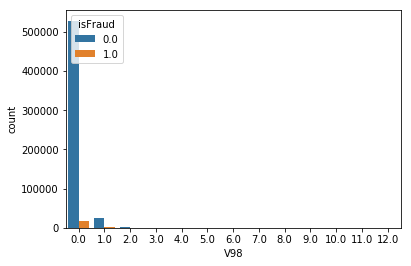

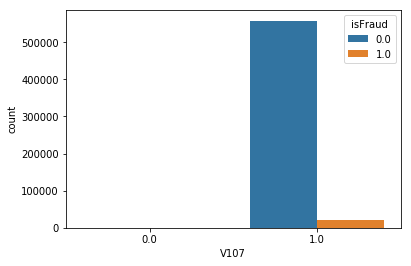

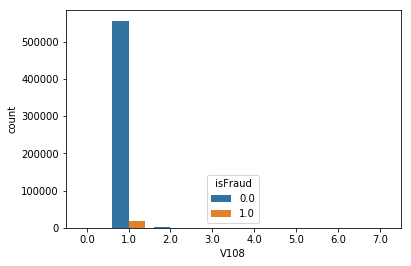

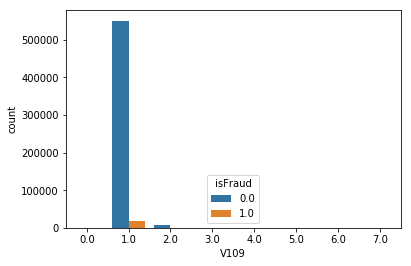

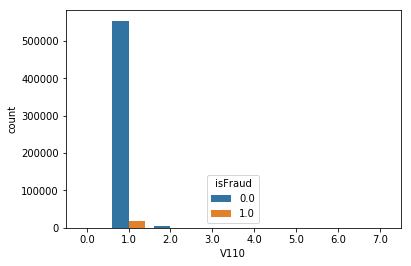

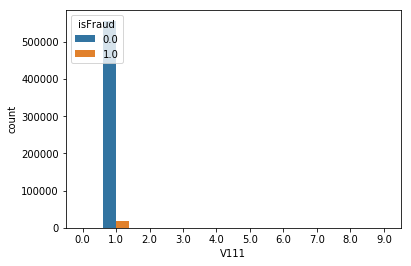

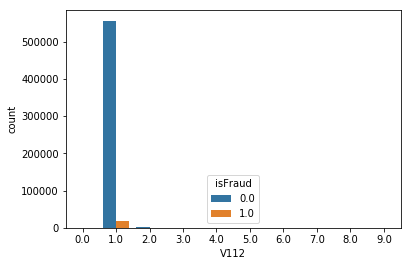

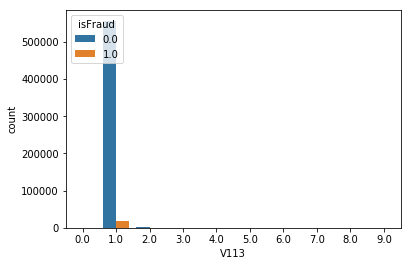

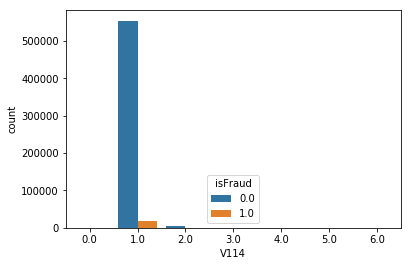

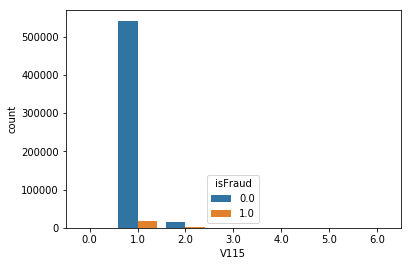

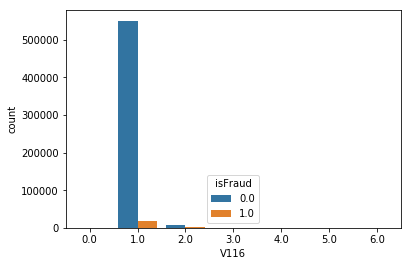

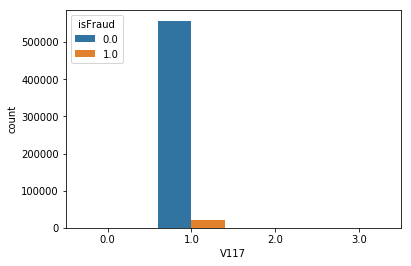

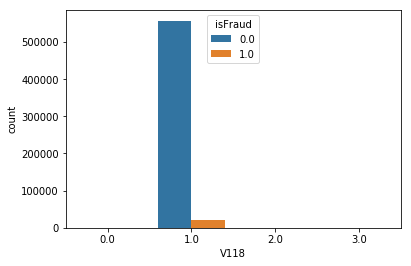

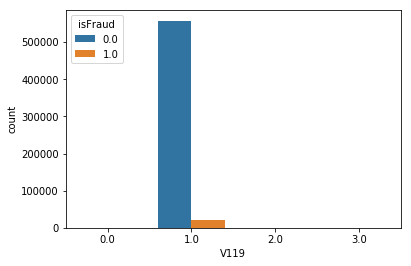

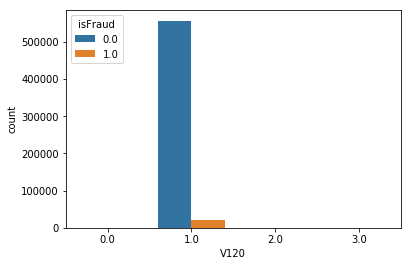

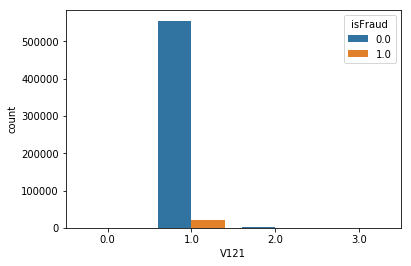

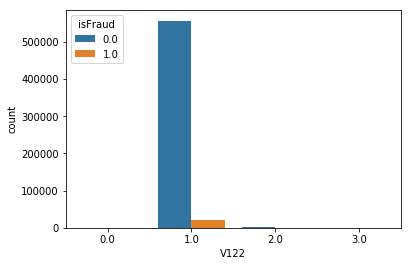

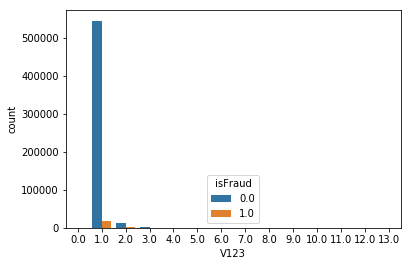

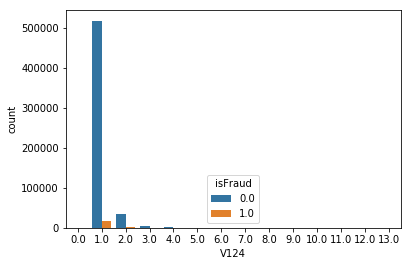

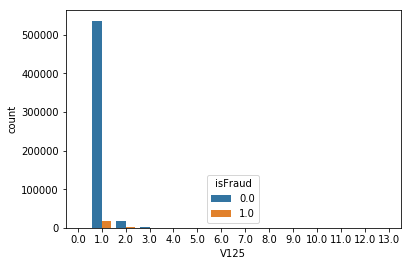

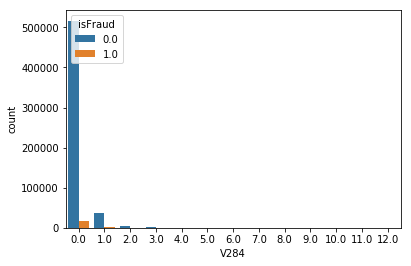

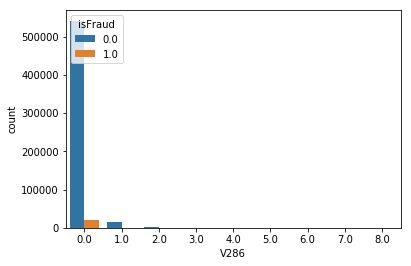

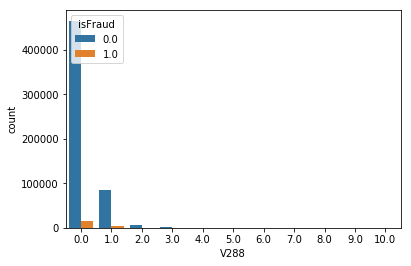

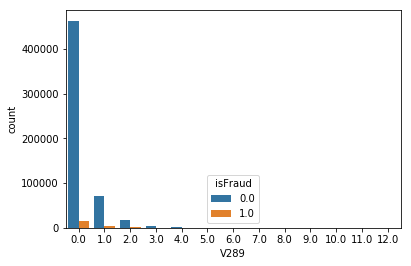

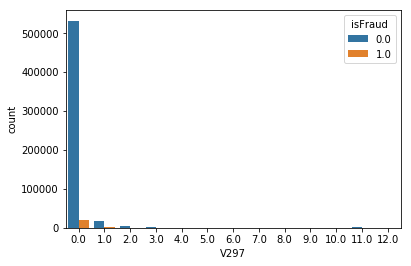

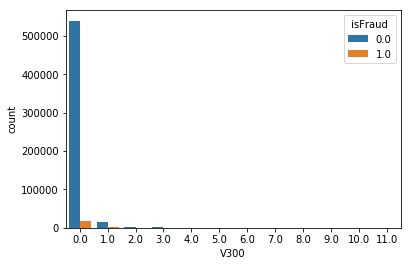

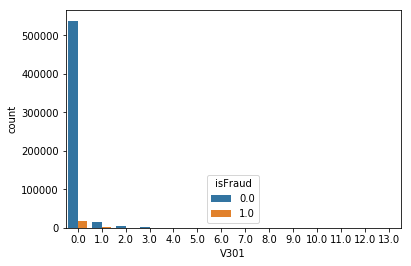

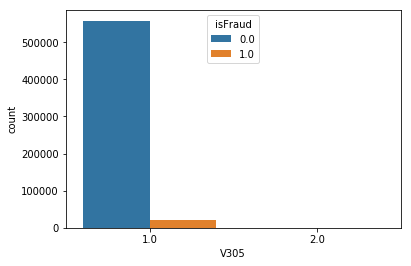

Wall time: 36.6 s


In [162]:
%%time
for col in train.columns[train.columns.str.startswith("V")]:
    if(train[col].nunique()>15):
        continue
    else:
        sns.countplot(data=train,x=col,hue="isFraud")
        plt.show()

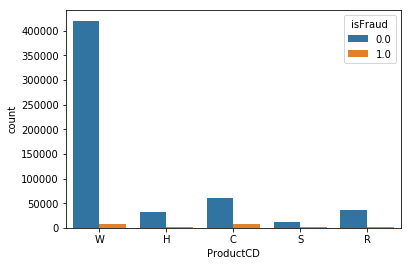

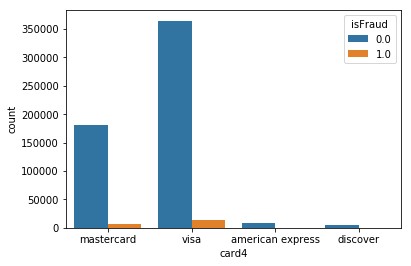

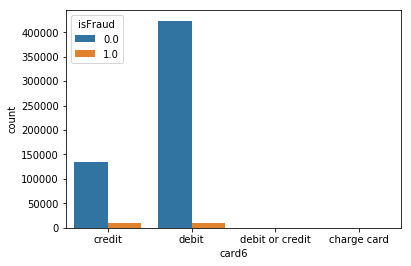

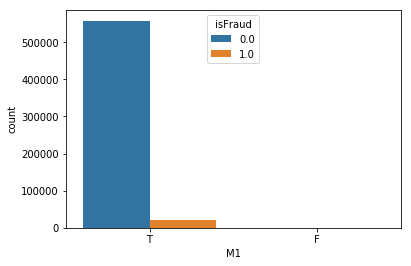

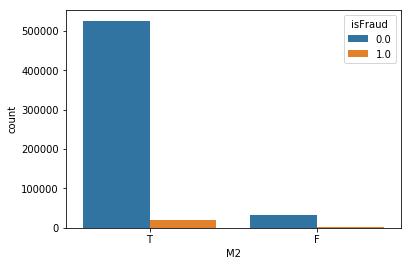

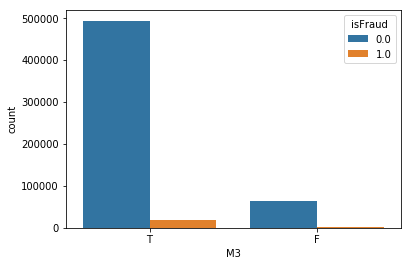

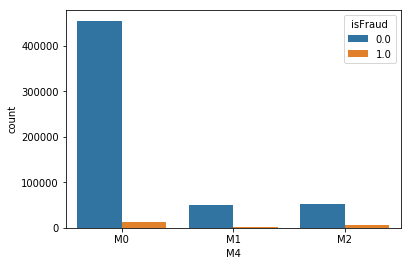

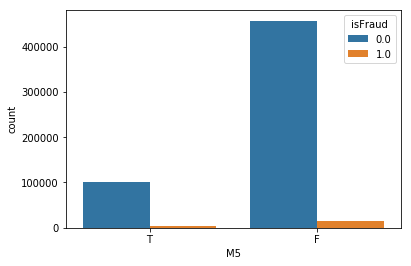

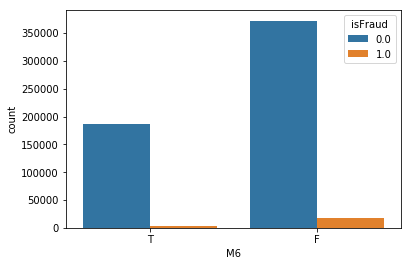

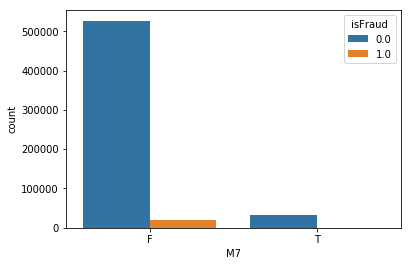

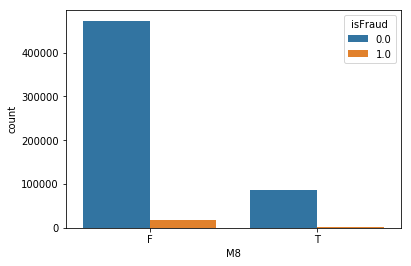

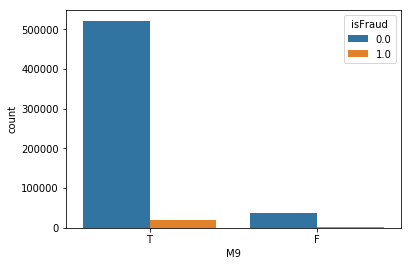

Wall time: 5.1 s


In [163]:
%%time
for col in train.select_dtypes(include="object").columns:
    if(train[col].nunique()>20):
        continue
    else:
        sns.countplot(data=train,x=col,hue="isFraud")
        plt.show()

In [164]:
train.shape

(578079, 231)

In [165]:
#sns.distplot(train.TransactionAmt,bins=20, rug=True);

In [166]:
train.isnull().sum().sort_values(ascending=False).head()

feature1_D15    0
V42             0
V40             0
V39             0
V38             0
dtype: int64

In [167]:
train.TransactionID.isnull().sum()

0

In [168]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578079 entries, 1 to 590539
Columns: 231 entries, TransactionID to feature1_D15
dtypes: float64(218), object(13)
memory usage: 1.0+ GB


In [169]:
train.memory_usage(deep=True).sum()

1504894908

In [171]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionID,578079.0,3.282152e+06,1.705885e+05,2987001.000,3134170.500,3282022.0,3.429354e+06,3.577539e+06
isFraud,578079.0,3.462503e-02,1.828283e-01,0.000,0.000,0.0,0.000000e+00,1.000000e+00
TransactionDT,578079.0,7.369386e+06,4.620045e+06,86401.000,3021247.500,7282427.0,1.123183e+07,1.581113e+07
TransactionAmt,578079.0,1.340726e+02,2.298710e+02,0.251,43.019,68.5,1.249500e+02,6.450970e+03
card1,578079.0,9.921322e+03,4.899275e+03,1000.000,6019.000,9749.0,1.422300e+04,1.839600e+04
card2,578079.0,3.624715e+02,1.578826e+02,100.000,212.000,361.0,5.120000e+02,6.000000e+02
card3,578079.0,1.532454e+02,1.139013e+01,100.000,150.000,150.0,1.500000e+02,2.310000e+02
card5,578079.0,1.994656e+02,4.111447e+01,100.000,166.000,226.0,2.260000e+02,2.370000e+02
addr1,578079.0,2.917059e+02,9.585504e+01,100.000,205.000,299.0,3.270000e+02,5.400000e+02
dist1,578079.0,9.106195e-02,2.876974e-01,0.000,0.000,0.0,0.000000e+00,1.000000e+00


In [174]:
#sns.distplot(train[train.columns[train.isnull().any()][3]].fillna("others"))

In [175]:
# from sklearn.preprocessing import Imputer
# # fill missing values with mean column values
# values = train.values
# imputer = Imputer()
# transformed_values = imputer.fit_transform(values)
# # count the number of NaN values in each column
# print(numpy.isnan(transformed_values).sum())

In [176]:
train.shape

(578079, 231)

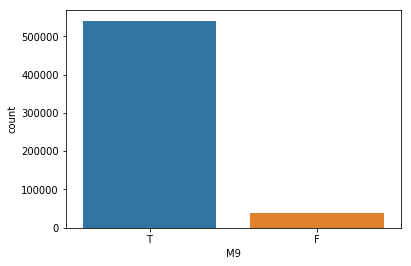

In [177]:
sns.countplot(x="M9",data=train)

In [178]:
train.groupby('isFraud').size()

isFraud
0.0    558063
1.0     20016
dtype: int64

In [189]:
categorical_cols=train.select_dtypes(include="object").columns

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler,RobustScaler,PolynomialFeatures

In [191]:
X=train.iloc[:,2:]
y=train.iloc[:,1]

# Make Heat Maps to find correlations

In [ ]:
#Use Pearson correlations

# Make Heat maps to find correlations in categorical variables using spearman's method

In [ ]:
#Use spearman correlations

In [192]:
encoder=LabelEncoder()

In [194]:
for col in categorical_cols:
    X[col]=encoder.fit_transform(X[col])

In [195]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7)

In [196]:
from lightgbm import LGBMClassifier

In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
#rf=RandomForestClassifier(n_estimators=100)
rf=LGBMClassifier(learning_rate=0.01,n_estimators=100,num_leaves=20,random_state=42,reg_alpha=0.5)

In [199]:
%%time
rf.fit(X_train,y_train)

Wall time: 8.42 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.01, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=20, objective=None,
        random_state=42, reg_alpha=0.5, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [200]:
predictions=rf.predict(X_test)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [201]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,roc_auc_score,roc_curve

In [202]:
print("Precision : ",precision_score(y_test,predictions))
print("Recall : ",recall_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("ROC score : ",roc_auc_score(y_test,predictions))

Precision :  0.9262618296529969
Recall :  0.1687863763742186
[[390552    187]
 [ 11568   2349]]
ROC score :  0.5841538980215512


In [209]:
%%time
test_identity=pd.read_csv("test_identity.csv")
test_transaction=pd.read_csv("test_transaction.csv")

Wall time: 42.5 s


In [210]:
test_identity.id_01=[x if x>=-20 else -10 for x in test_identity.id_01]
test_identity.id_03=[1 if x>0 else (-1 if x<0 else 0) for x in test_identity.id_03]
test_identity.id_04=[1 if x<0 else x for x in test_identity.id_04]
test_identity.id_09=[1 if x>0 else (-1 if x<0 else 0) for x in test_identity.id_09]
test_identity.id_10=[1 if x<0 else x for x in test_identity.id_10]
test_identity.id_02.fillna(test_identity.id_02.median(),inplace=True)
test_identity.id_05=[x if x>0 else -1 for x in test_identity.id_05]
test_identity.id_10.fillna(0,inplace=True)


In [212]:
#test_identity.id_13.mode()[0]
test_identity.id_13.fillna(test_identity.id_13.mode()[0],inplace=True)


In [213]:
test_identity.id_14=[1 if x >0 else (-1 if x < 0 else 0) for x in test_identity.id_14]
test_identity.id_15.fillna("Unknown",inplace=True)
test_identity.id_16.fillna("NotFound",inplace=True)
test_identity.id_29.fillna("NotFound",inplace=True)
test_identity.id_32.fillna(24,inplace=True)
test_identity.id_34=[1 if x=="match_status:1" else x for x in test_identity.id_34]
test_identity.id_34=[2 if x=="match_status:2" else x for x in test_identity.id_34]
test_identity.id_34=[-1 if x=="match_status:-1" else x for x in test_identity.id_34]
test_identity.id_34=[0 if x=="match_status:0" else x for x in test_identity.id_34]
test_identity.id_34.fillna(-1,inplace=True)
test_identity.id_06.fillna(0,inplace=True)
test_identity.id_13.fillna(52,inplace=True)
test_identity.id_17.fillna(166,inplace=True)
test_identity.id_18.fillna(15,inplace=True)
test_identity.id_19.fillna(test_identity.id_19.median(),inplace=True)

In [217]:
%%time
test=test_transaction.merge(test_identity,how="left",on="TransactionID")

Wall time: 14.9 s


In [218]:
temp_list=list(X.columns)

In [219]:
temp_list.append("TransactionID")

In [220]:
test.shape

(506691, 433)

In [221]:
test.loc[test.addr1.isna(),"addr1"]=test.addr1.median()
test.loc[test.dist1.isna(),"dist1"]=0
test.dist1=[0 if x<=28 else 1 for x in test.dist1]
test.loc[test.D2.isna(),"D2"]=test.D2.median()
test.loc[test.P_emaildomain.isna(),"P_emaildomain"]="gmail.com"
test["Feature1_D3"]=[1 if x>600 else 0 for x in test.D3]
test.loc[test.D4.isna(),"D4"]=test.D4.median()
test["feature1_D4"]=[1 if x<0 else 0 for x in test.D4]
test["feature2_D4"]=[1 if x<600 else 0 for x in test.D4]
test.D5.fillna(test.D5.median(),inplace=True)
test["feature1_D5"]=[1 if x>630 else 0 for x in test.D5]
test.D10.fillna(test.D10.median(),inplace=True)
test["feature1_D10"]=[1 if x>630 else 0 for x in test.D10]
test.D11.fillna(test.D11.median(),inplace=True)
test["feature1_D11"]=[1 if x<0 else 0 for x in test.D11]
test.D15.fillna(test.D15.median(),inplace=True)
test["feature1_D15"]=[1 if x<0 else 0 for x in test.D15]

In [222]:
test_copy=test[temp_list].copy()

In [223]:
test_copy.columns[test_copy.isnull().any()]

Index(['card2', 'card3', 'card4', 'card5', 'card6', 'C1', 'C2', 'C3', 'C4',
       'C5',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=166)

In [224]:
for col in test.select_dtypes(include="object").columns:
    test.loc[test[col].isna(),col]=test[col].mode()[0]

for col in test.select_dtypes(exclude="object").columns:
    test.loc[test[col].isna(),col]=test[col].median()

In [225]:
#Number of columns with null rows
len(test.columns[test.isnull().any()])

0

In [226]:
for col in categorical_cols:
    test[col]=encoder.fit_transform(test[col])

In [227]:
%%time
test_prediction=rf.predict_proba(test[X.columns])

Wall time: 7.26 s


In [228]:
test["isFraud"]=test_prediction[:,1]

In [231]:
test.TransactionID.dtype

dtype('float64')

In [233]:
test.loc[:,"TransactionID"]=test.TransactionID.astype("int32")

In [235]:
test[["TransactionID","isFraud"]].to_csv("./submissions/submission_Aug10.csv",index=False)

In [78]:
from xgboost import XGBClassifier

In [103]:
xgb=XGBClassifier(random_state=42,silent=False,max_depth=12)

In [104]:
%%time
xgb.fit(X_train,y_train)

[02:09:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 754 extra nodes, 0 pruned nodes, max_depth=12
[02:09:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 740 extra nodes, 0 pruned nodes, max_depth=12
[02:09:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 754 extra nodes, 0 pruned nodes, max_depth=12
[02:09:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 810 extra nodes, 0 pruned nodes, max_depth=12
[02:09:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes, 0 pruned nodes, max_depth=12
[02:09:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 872 extra nodes, 0 pruned nodes, max_depth=12
[02:09:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tr

[02:12:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1044 extra nodes, 0 pruned nodes, max_depth=12
[02:12:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 608 extra nodes, 0 pruned nodes, max_depth=12
[02:12:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 510 extra nodes, 0 pruned nodes, max_depth=12
[02:12:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 732 extra nodes, 0 pruned nodes, max_depth=12
[02:12:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=12
[02:12:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 694 extra nodes, 0 pruned nodes, max_depth=12
[02:12:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: t

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=12, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1)

In [105]:
predictions=xgb.predict(X_test)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [106]:
print("Precision : ",precision_score(y_test,predictions))
print("Recall : ",recall_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("ROC score : ",roc_auc_score(y_test,predictions))

Precision :  0.9220441156322784
Recall :  0.4679460436656932
[[396320    569]
 [  7652   6730]]
ROC score :  0.7332561967255748


In [107]:
test_prediction=xgb.predict_proba(test[X.columns])

In [108]:
test["isFraud"]=test_prediction[:,1]

In [109]:
test[["TransactionID","isFraud"]].to_csv("./submissions/submission_Jul27.csv",index=False)